## 📦 **Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re, string

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## 🔒 **Random State Initialization**

In [2]:
np.random.seed(2023)

## 🗃️ **Data Preparation**

In [33]:
dir = 'C:/Users/ASUS/Downloads/karira-id/data/'

projects = pd.read_csv(dir + 'projects.csv')
projects_from_past = pd.read_csv(dir + 'projects-from-past.csv')

services = pd.read_csv(dir + 'services.csv')
services_title = pd.read_csv(dir + 'services-title.csv')

kamus_alay = pd.read_csv(
    'https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv'
    )
kamus_alay = kamus_alay.filter(['slang', 'formal'], axis = 1).drop_duplicates(subset = ['slang'])
kamus_alay_map = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

### 📂 **`projects`**

In [4]:
projects.head()

,budget,description,finishDays,project_tags,publishedDate,title
0,250000,menulis 1 artikel review mengenai apartemen di...,7,Writing,23/04/2023 20:27:17 WIB,Penulis Yang Tinggal Di Apartemen Jakarta
1,350000,pekerjaan membuat artikel di salah satu media...,7,"Blog,Blogspot,Content Management System (CMS),...",24/04/2023 17:27:08 WIB,Membuat Artikel Di Media Online
2,200000,hi saya ada 12 video rata-rata 1 menit untuk d...,7,"Social Media Marketing (SMM),Adobe Illustrator...",20/05/2023 21:50:31 WIB,Editing 12 Shortt Video Untuk Konten Tiktok
3,1000000,yang punya akun canva creator element atau can...,7,"Design Arts,Graphic Design,Logo Design,Canva",03/05/2023 08:35:54 WIB,Cari Akun Canva Creator Element Atau Template
4,150000,sedang mencari jasa upload aplikasi ke app store,7,iPhone/iOS,20/05/2023 17:42:39 WIB,Cari Jasa Upload Aplikasi Ke App Store


In [5]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   budget         325 non-null    int64 
 1   description    325 non-null    object
 2   finishDays     325 non-null    int64 
 3   project_tags   325 non-null    object
 4   publishedDate  325 non-null    object
 5   title          325 non-null    object
dtypes: int64(2), object(4)
memory usage: 15.4+ KB


In [6]:
projects_from_past.head()

,budget,description,finishDays,project_tags,publishedDate,title
0,"\nRp 750,000",[ this is a private project. only invited user...,4,"Website,Wordpress,Web Design,Website Building,...",20/05/2023 16:20:56 WIB,Service Order From Irfy77: Jasa Pembuatan Webs...
1,"\nRp 250,000",saya membutuhkan logo untuk toko mainan saya. ...,7,"CorelDRAW,Adobe Illustrator,AAA Logo",20/05/2023 13:16:11 WIB,Project Logo Toko Mainan
2,"\nRp 125,000",bantu saya ubah endpoint dari javascript ke go...,2,"JavaScript,Golang",20/05/2023 10:40:59 WIB,Bantu Ubah Endpoint Javascript Ke Golang Gorm
3,"\nRp 52,000",[ this is a private project. only invited user...,1,Instagram,20/05/2023 10:16:26 WIB,Service Order From Anakiblis11: Jasa Like Inst...
4,"\nRp 90,000",[ this is a private project. only invited user...,6,"Writing,Content Writer",20/05/2023 08:02:46 WIB,Penulisan 6 Artikel Bahasa


In [7]:
projects_from_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75350 entries, 0 to 75349
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   budget         75350 non-null  object
 1   description    75338 non-null  object
 2   finishDays     75350 non-null  object
 3   project_tags   75315 non-null  object
 4   publishedDate  75350 non-null  object
 5   title          75300 non-null  object
dtypes: object(6)
memory usage: 3.4+ MB


### 📂 **`services`**

In [8]:
services.head()

,description,fixedFee,service_tags,workDuration
0,saya bisa membuat sistem dan tampilan website ...,Rp 650000,"Web Programming,PHP,Website,Wordpress,Website ...",30 hari
1,kesusahan slicing design mobile apps atau meng...,Rp 200000,"Java,Mobile Programming,Windows Mobile,Swift,J...",3 hari
2,kalau denger kata iklan pasti yang di pikiran ...,Rp 150000,"Advertising,Design Arts,Brochure,Graphic Desig...",3 hari
3,sulit intregasi mutasi bank ke sistem anda? ka...,Rp 500000,"JavaScript,PHP,CodeIgniter,Yii,Website,Website...",7 hari
4,kami melayani pembuatan desain dengan harga mu...,Rp 150000,"CorelDRAW,Graphic Design,Logo Design,Adobe Pho...",3 hari


In [9]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14425 entries, 0 to 14424
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   14425 non-null  object
 1   fixedFee      14425 non-null  object
 2   service_tags  14308 non-null  object
 3   workDuration  14425 non-null  object
dtypes: object(4)
memory usage: 450.9+ KB


In [10]:
services_title.head()

,title
0,Tiru Website Lain Sesuai Keinginan (Cloning)
1,Jasa Slicing Design Mobile Apps Profesional Be...
2,Jasa Pembuatan Iklan Menarik Dan Informatif
3,Jasa Intregasi Mutasi Bank Profesional Bergaransi
4,Jasa Slicing Design Profesional


In [11]:
services_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14425 entries, 0 to 14424
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   14425 non-null  object
dtypes: object(1)
memory usage: 112.8+ KB


## 📊 **Exploratory Data Analysis**

In [58]:
def clean(text):
  text = text.lower()
  text = re.sub(r'(http[s]?://\S+)|(www\.\S+)', '', text)
  text = re.sub(r"\b[a-zA-Z]\b", " ", text)
  text = re.sub('[^0-9a-zA-Z]+', ' ', text)
  text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
  text = text.strip()
  text = re.sub('\s+',' ',text)
  text = ' '.join([kamus_alay_map[word] if word in kamus_alay_map else word for word in text.split(' ')])
  return text

stop_factory = StopWordRemoverFactory().get_stop_words()
extra_stopwords = [
    'terima', 'kasih', 'nya', 'berikut', 'tersebut', 'silakan', 'jadi', 'lainnya', 'halo',
    'buat', 'buatkan', 'membuat', 'pembuatan', 'bikin', 'butuh', 'dibutuhkan', 'mau', 
    'cari', 'mencari', 'dicari', 'membutuhkan', 'mengenai', 'dibuat', 'terimakasih', 'apabila',
    'nantinya', 'menggunakan', 'perlu', 'lalu'
    ]
list_stopwords = stop_factory + extra_stopwords
stopwords = StopWordRemover(ArrayDictionary(list_stopwords))
stemmer = StemmerFactory().create_stemmer()

In [47]:
project = pd.concat([projects, projects_from_past], ignore_index = True)

### 📂 **`projects`**

#### **Missing Values Overview**

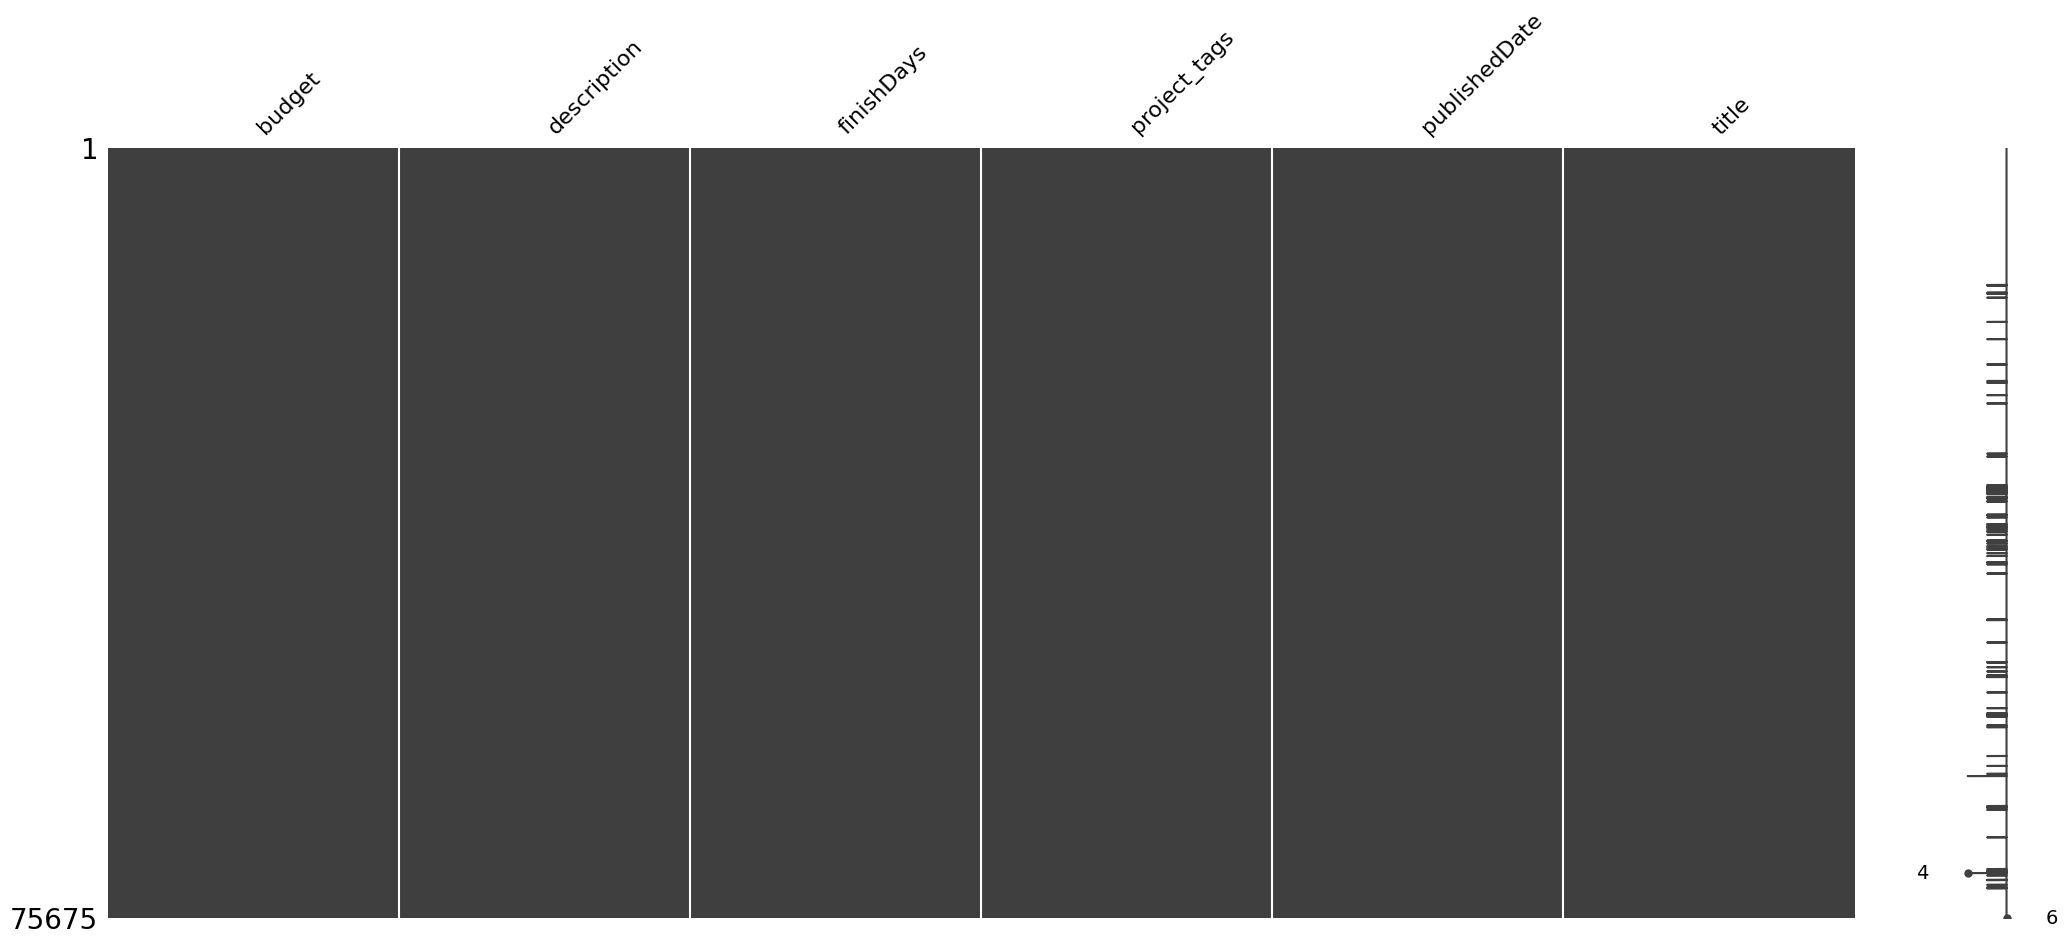

In [14]:
msno.matrix(projects)
plt.show()

In [18]:
round(projects.isna().mean().sort_values(ascending = False), 4)

budget           0.0
description      0.0
finishDays       0.0
project_tags     0.0
publishedDate    0.0
title            0.0
dtype: float64

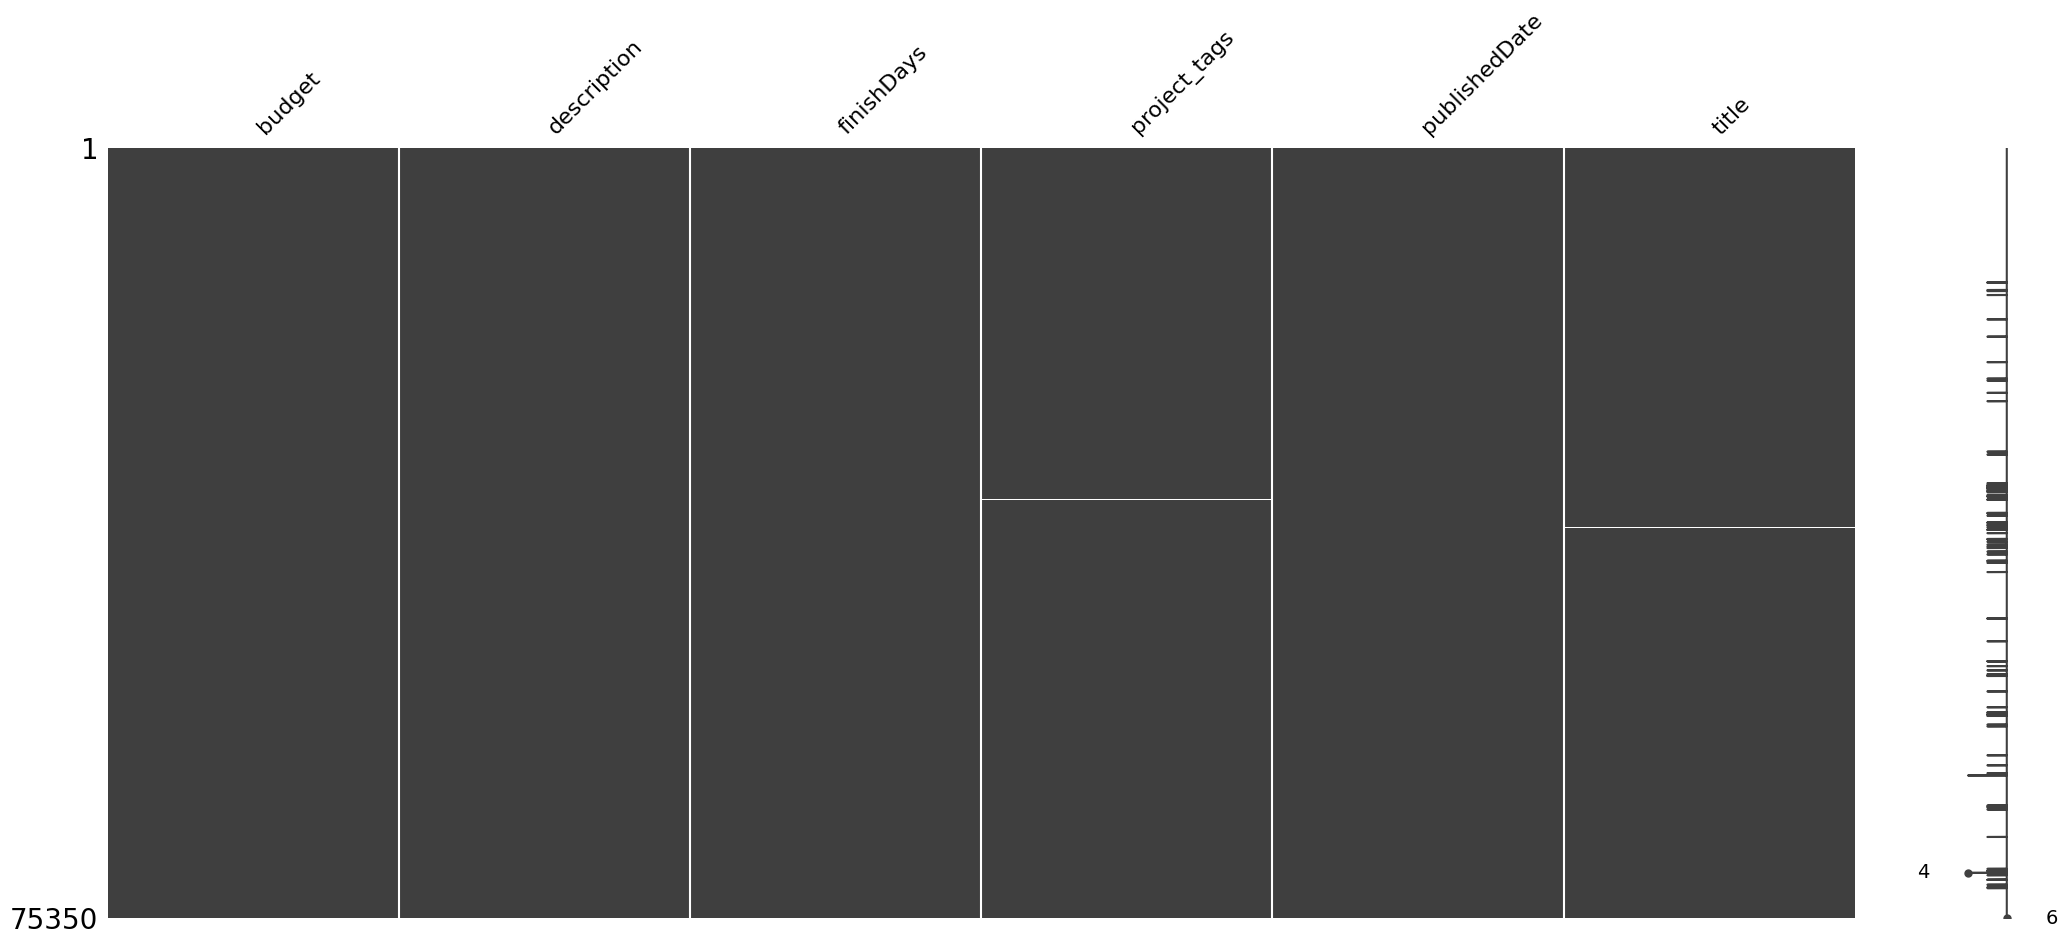

In [16]:
msno.matrix(projects_from_past)
plt.show()

In [17]:
round(projects_from_past.isna().mean().sort_values(ascending = False), 4)

title            0.0007
project_tags     0.0005
description      0.0002
budget           0.0000
finishDays       0.0000
publishedDate    0.0000
dtype: float64

#### **Features Overview**

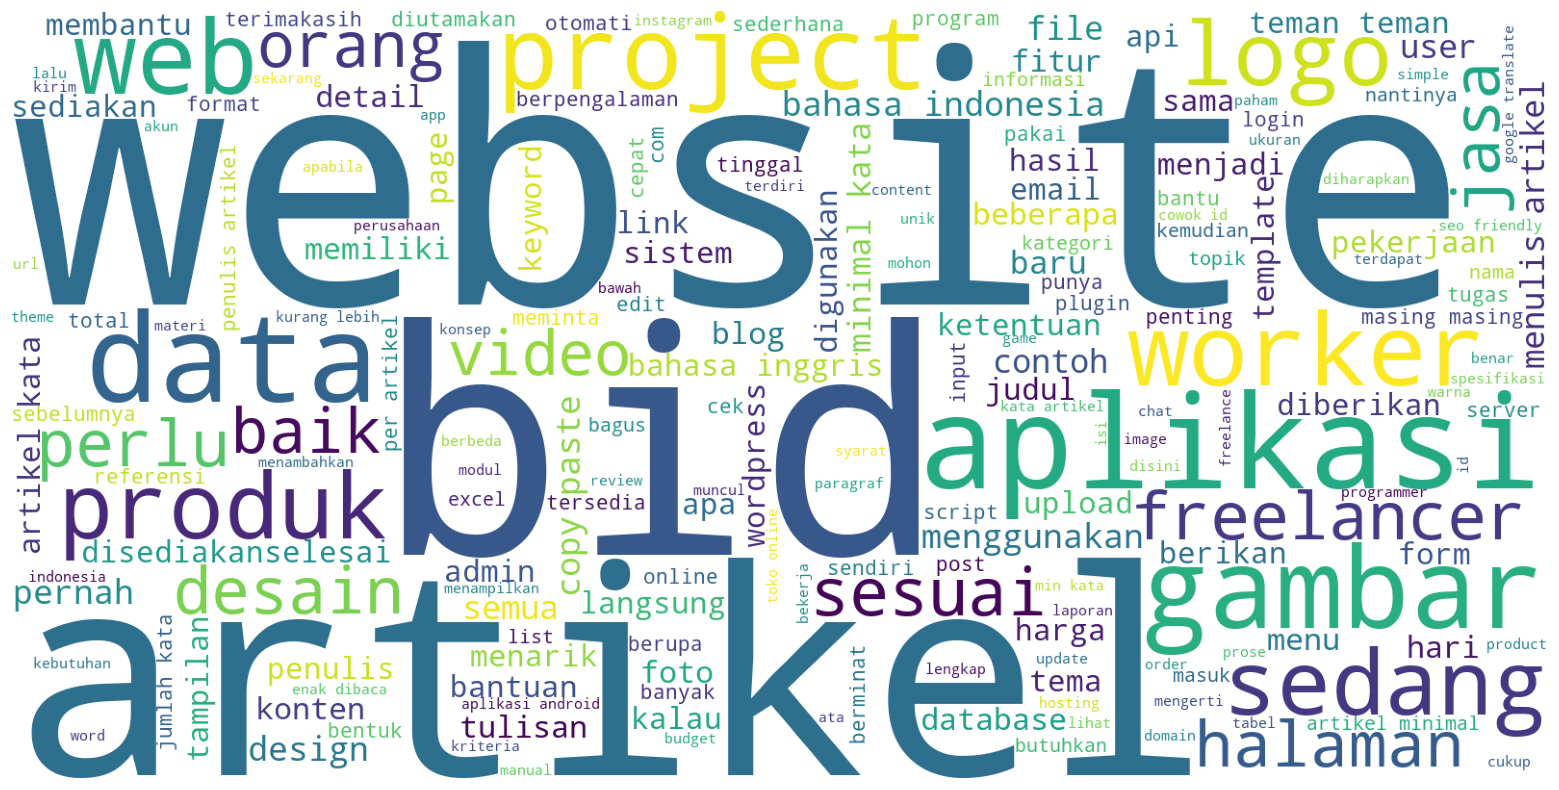

In [59]:
project['description'] = project['description'].replace(
    '[ this is a private project. only invited users can see the description. ]', np.nan
    )
project.dropna(inplace = True)
project['description'] = project['description'].astype(str).apply(clean)

plt.figure(figsize = (30, 10))
plt.imshow(
    WordCloud(
        width = 1600, height = 800,
        background_color = 'white',
        stopwords = list_stopwords
        ).generate(" ".join(text for text in project['description'].dropna()))
)
plt.axis('off')
plt.show()

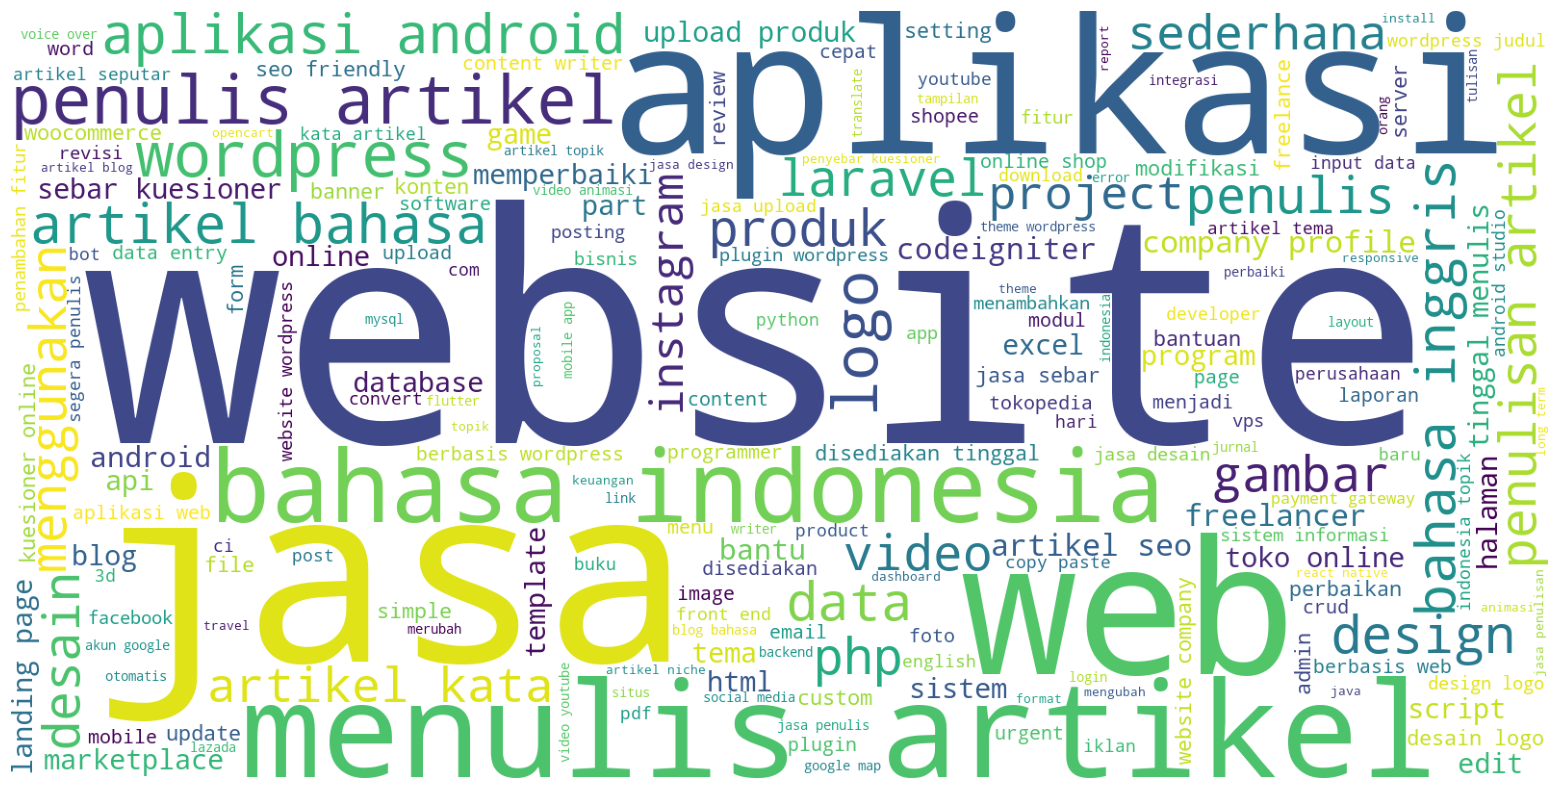

In [57]:
project['title'] = project['title'].astype(str).apply(clean)
plt.figure(figsize = (30, 10))
plt.imshow(
    WordCloud(
        width = 1600, height = 800,
        background_color = 'white',
        stopwords = list_stopwords
        ).generate(" ".join(text for text in project['title'].dropna()))
)
plt.axis('off')
plt.show()

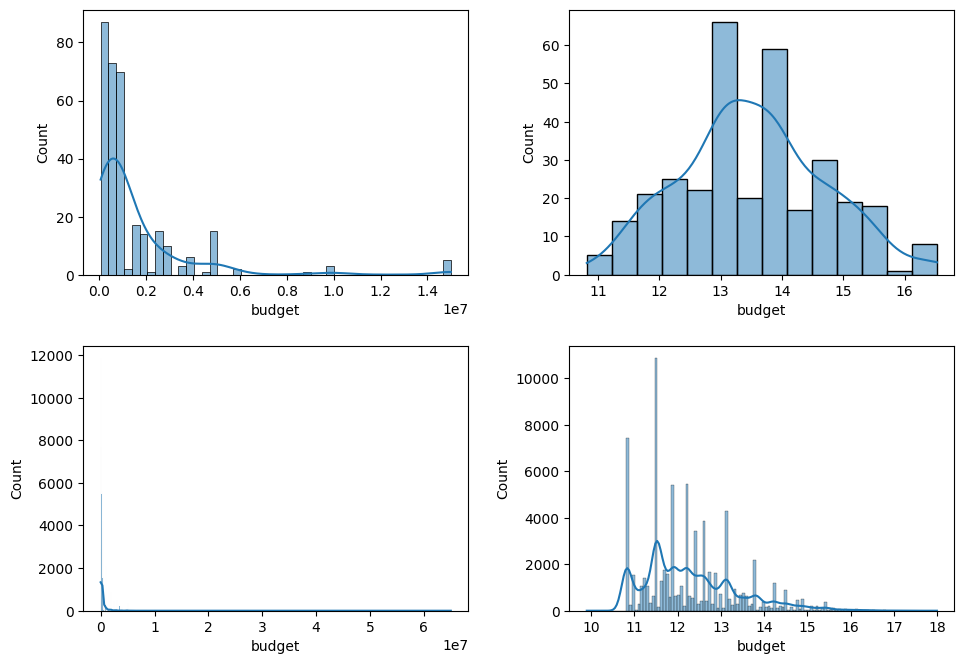

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

sns.histplot(projects['budget'], kde = True, ax = axes[0, 0])
sns.histplot(np.log(projects['budget']), kde = True, ax = axes[0, 1])

projects_from_past['budget'] = projects_from_past['budget'].str.replace('[\nRp,]', '', regex = True).astype(int)
sns.histplot(projects_from_past['budget'], kde = True, ax = axes[1, 0])
sns.histplot(np.log(projects_from_past['budget']), kde = True, ax = axes[1, 1])

plt.tight_layout(pad = 2)
plt.show()

In [ ]:
project = pd.concat([projects, projects_from_past], ignore_index = True)
project.info()

In [ ]:
project_tags_corpus = project['project_tags'].apply(lambda text: str(text))
vectorizer = CountVectorizer(tokenizer = tokenize_tags).fit(project_tags_corpus)
tags_vec = vectorizer.transform(project_tags_corpus)
kmeans = KMeans(n_clusters = 6, init = 'k-means++', algorithm = 'auto').fit(tags_vec)
project['tags_cluster'] = kmeans.predict(tags_vec)

In [ ]:
word_cloud = df[['desc_clean']].copy()
text = " ".join(review for review in word_cloud.desc_clean.dropna())
wordcloud = WordCloud(width = 1600, height = 800, background_color = 'white', stopwords = list_stopwords).generate(text)
plot_cloud(wordcloud)

### 📂 **`services`**

#### **Missing Values Overview**

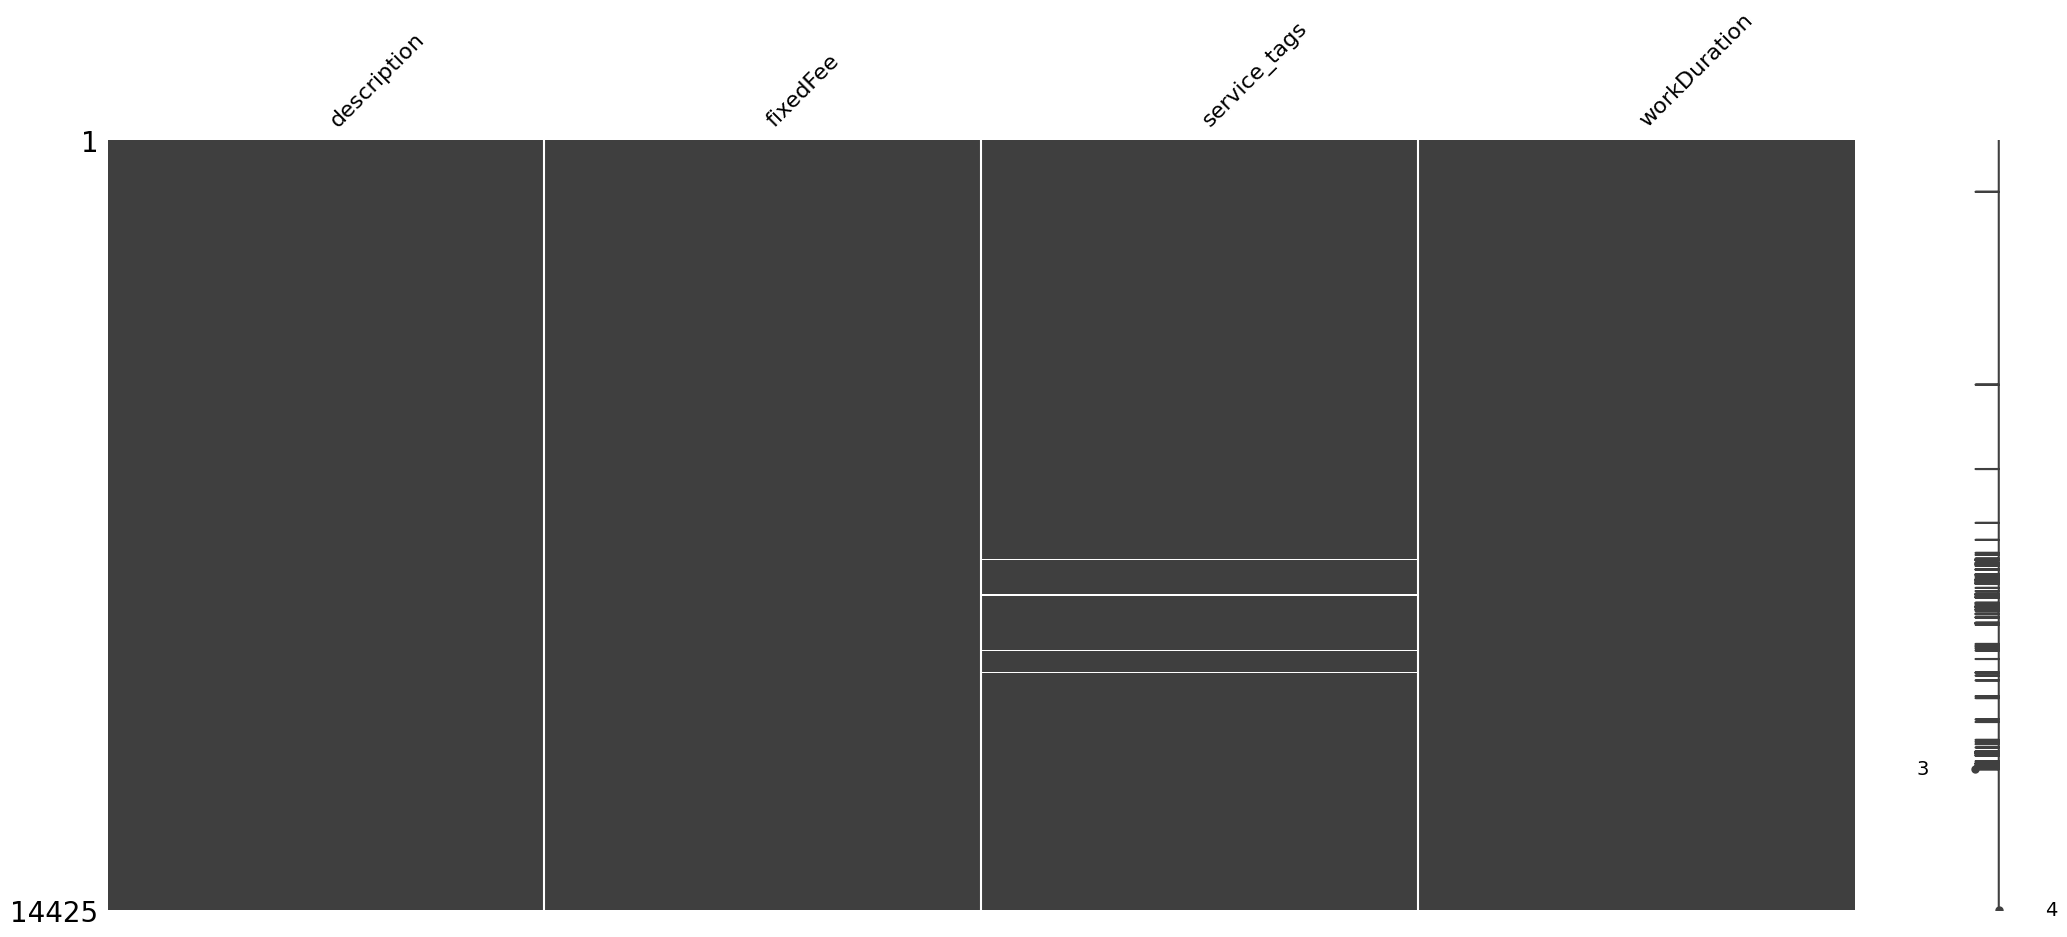

In [ ]:
msno.matrix(services)
plt.show()

In [ ]:
round(services.isna().mean().sort_values(ascending = False), 4)

service_tags    0.0081
description     0.0000
fixedFee        0.0000
workDuration    0.0000
dtype: float64

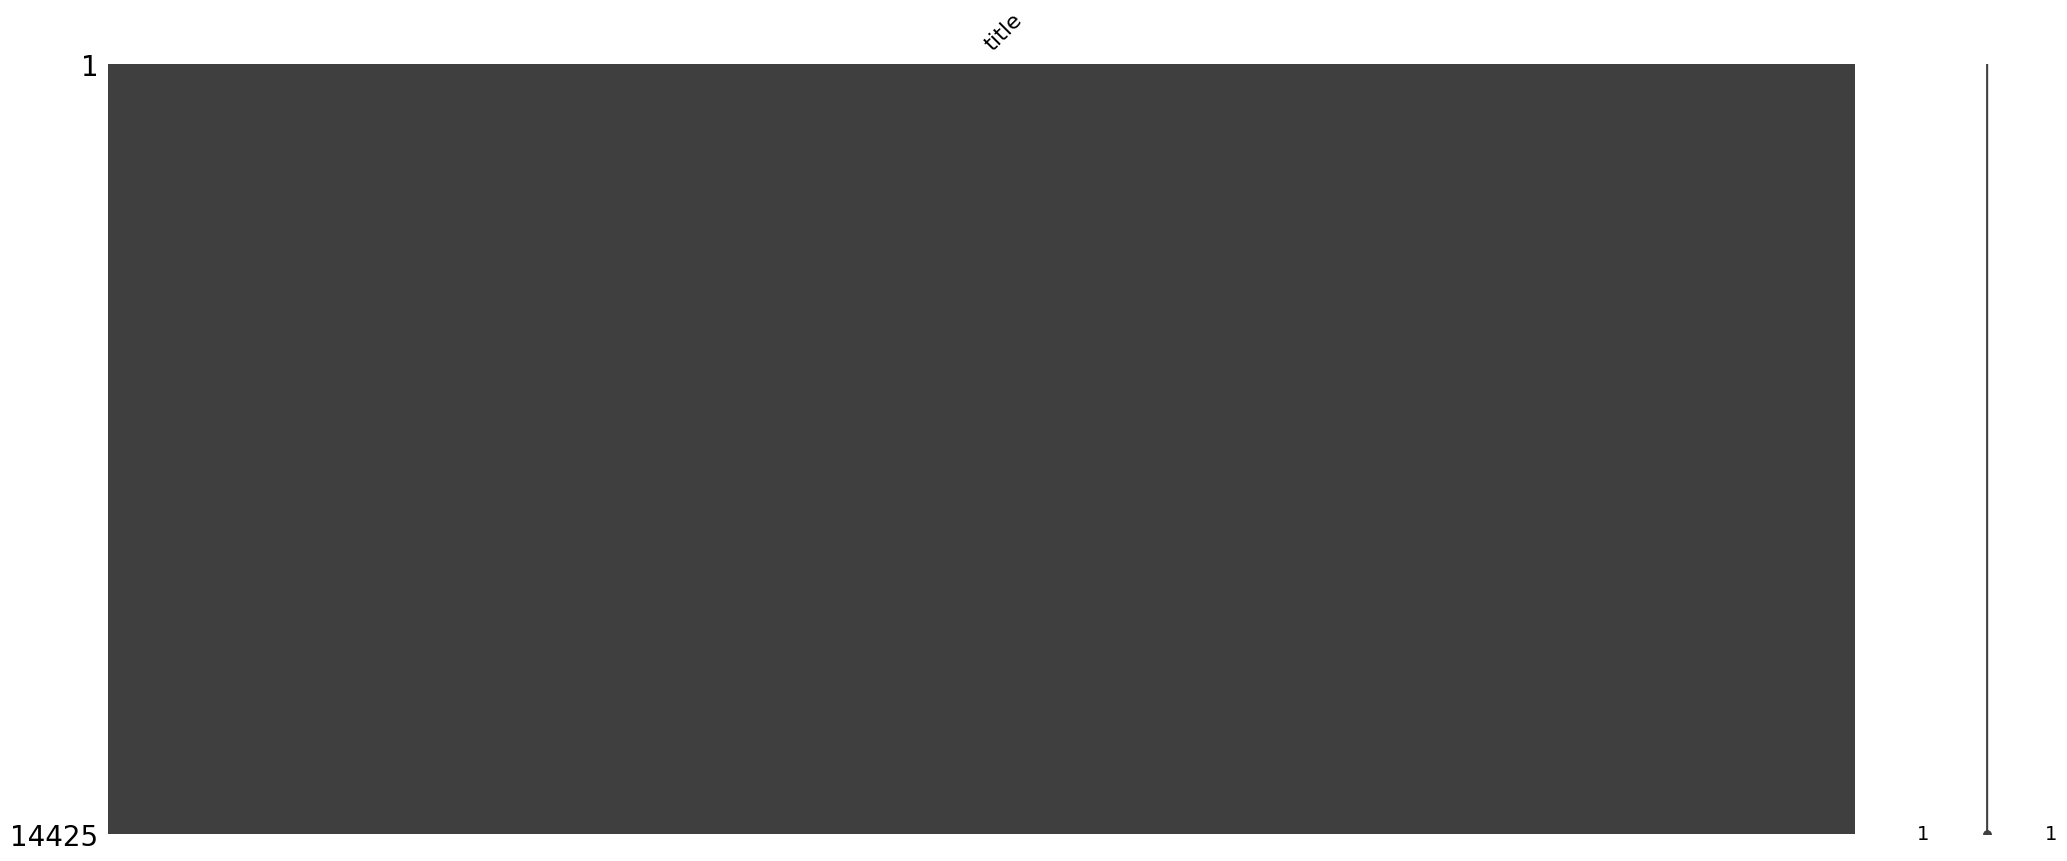

In [ ]:
msno.matrix(services_title)
plt.show()

In [ ]:
round(services_title.isna().mean().sort_values(ascending = False), 4)

title    0.0
dtype: float64

#### **Target Overview**

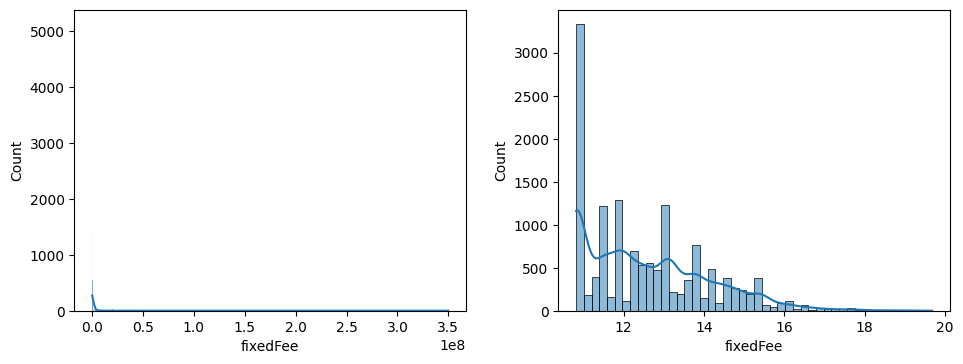

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

services['fixedFee'] = services['fixedFee'].str.replace('Rp', '').astype(int)
sns.histplot(services['fixedFee'], kde = True, ax = axes[0])
sns.histplot(np.log(services['fixedFee']), kde = True, ax = axes[1])

plt.tight_layout(pad = 2)
plt.show()

## 🛠️ **Data Preprocessing**

In [ ]:
projects_from_past['finishDays'] = projects_from_past['finishDays'].str.replace(',', '').astype(pd.Int64Dtype())

project = pd.concat([projects, projects_from_past], ignore_index = True)
project['text'] = project['title'] + " " + project['description']
project['text'] = project['text'].astype(str)
project['tags_token'] = project['project_tags'].str.split(',').astype(str)
project['budget'] = project['budget'].apply(lambda x: np.nan if x == 0 else x)
project['finishDays'] = project['finishDays'].apply(lambda x: np.nan if x > 365 else x)
project.dropna(inplace = True)
project['text_clean'] = project['text'].astype(str).apply(clean)

project = project[['text_clean', 'finishDays', 'tags_token', 'budget']]
project.reset_index(drop = True, inplace = True)
project

In [ ]:
service = pd.concat([services, services_title], axis = 1)
service['text'] = service['title'] + " " + service['description']
service['text'] = service['text'].astype(str)
#service['fixedFee'] = service['fixedFee'].str.replace('Rp', '').astype(int)
service['workDuration'] = service['workDuration'].str.replace('[hari,]', '', regex = True).astype(int)
service['workDuration'] = service['workDuration'].apply(lambda x: np.nan if x > 365 else x)
service['workDuration'] = service['workDuration'].apply(lambda x: np.nan if x == 0 else x)
service['tags_token'] = service['service_tags'].str.split(',').astype(str)
service['text_clean'] = service['text'].astype(str).apply(clean)
service.dropna(inplace = True)

service = service[['text_clean', 'workDuration', 'tags_token', 'fixedFee']]
service.reset_index(drop = True, inplace = True)
service